In [1]:
! pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 38.2/38.2 MB 6.7 MB/s eta 0:00:00
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\hrush\AppData\Local\Temp\pip-install-1xpdwy9v\tensorflow-gpu_eb174b89f8574e5cb4633bdac310a9ee\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [12]:
! pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


### import libs

In [ ]:
import tensorflow as tf
import os

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove dodgy images

In [13]:
import cv2
import imghdr

In [14]:
#directory path
data_dir = 'data'

In [15]:
#image extensions
image_exts = ['jpeg','jpg','bmp','png']

In [16]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\5b9e7d542100003100c5f33e.jpeg
Image not in ext list data\happy\83748984.jpg
Image not in ext list data\happy\growlibraryimg-1.png
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\happiness-overview-guide-1440x810.jpg
Image not in ext list data\happy\happy-business-man-woman-jumping-260nw-168748874.jpg
Image not in ext list data\happy\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in ext list data\happy\traitshappypeople.jpg
Image not in ext list data\sad\168745183-young-sad-man-hand-stop-sign.jpg
Image not in ext list data\sad\2bnso9uiwlhrikrx.jpg
Image not in ext list data\sad\39843138-sad-man.jpg
Image not in ext list data\sad\alone-sad-pictures-vgmzjjaww2cxw2gq.jpg
Image not in ext list data\sad\businessman-sitting-on-floor-after-260nw-1897077169.jpg
Image not in ext list data\sad\depositpho

### LOAD Data

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [43]:
#builds image dataset, datapipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 162 files belonging to 2 classes.


In [33]:
# datapipeline iterator
data_iterator = data.as_numpy_iterator()

In [40]:
# grabs all data in numpy array 
# it has 'len = 2' -> it contains images, labels 
batch = data_iterator.next()
batch

(array([[[[  1.7421875 ,   1.7421875 ,   0.        ],
          [  2.7734375 ,   2.7734375 ,   0.7734375 ],
          [  1.        ,   1.        ,   1.        ],
          ...,
          [ 14.926041  ,  11.926041  ,   6.9260406 ],
          [ 13.942032  ,  10.942032  ,   5.942032  ],
          [ 12.        ,   9.        ,   4.        ]],
 
         [[  2.3118744 ,   2.3118744 ,   0.5696869 ],
          [  2.947342  ,   2.947342  ,   0.9473419 ],
          [  1.        ,   1.        ,   1.        ],
          ...,
          [ 14.7109375 ,  11.7109375 ,   6.7109375 ],
          [ 13.7734375 ,  10.7734375 ,   5.7734375 ],
          [ 13.337265  ,  10.337265  ,   5.337265  ]],
 
         [[  2.9494781 ,   2.9494781 ,   0.94947815],
          [  3.        ,   3.        ,   1.        ],
          [  1.        ,   1.        ,   1.        ],
          ...,
          [ 16.070969  ,  13.070969  ,   8.070969  ],
          [ 15.279297  ,  12.279297  ,   7.279297  ],
          [ 14.279297  ,  11.27

In [35]:
#images represented as numpy arrays
batch[0]

array([[[[ 21.      ,  23.      ,  22.      ],
         [ 21.802734,  23.802734,  22.802734],
         [ 21.052399,  23.052399,  22.052399],
         ...,
         [212.      , 216.      , 217.      ],
         [211.      , 215.      , 218.      ],
         [207.90625 , 212.45312 , 215.89212 ]],

        [[ 21.591797,  23.591797,  22.591797],
         [ 21.591797,  23.591797,  22.591797],
         [ 22.      ,  24.      ,  23.      ],
         ...,
         [212.26562 , 216.26562 , 217.26562 ],
         [210.35938 , 214.35938 , 217.06598 ],
         [209.12949 , 212.77676 , 218.54688 ]],

        [[ 21.013672,  23.013672,  22.013672],
         [ 22.      ,  24.      ,  23.      ],
         [ 23.      ,  25.      ,  24.      ],
         ...,
         [213.26562 , 217.26562 , 217.73438 ],
         [212.28616 , 214.36429 , 216.72366 ],
         [210.4606  , 214.4606  , 217.44821 ]],

        ...,

        [[ 15.      ,  16.      ,  18.      ],
         [ 15.      ,  16.      ,  18.      ]

In [41]:
#labels represented as numpy arrays
# everytime you run the iterator, new batch of data from datapipeline
batch[1]
# 1 = sad people
# 0 = happy people


array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

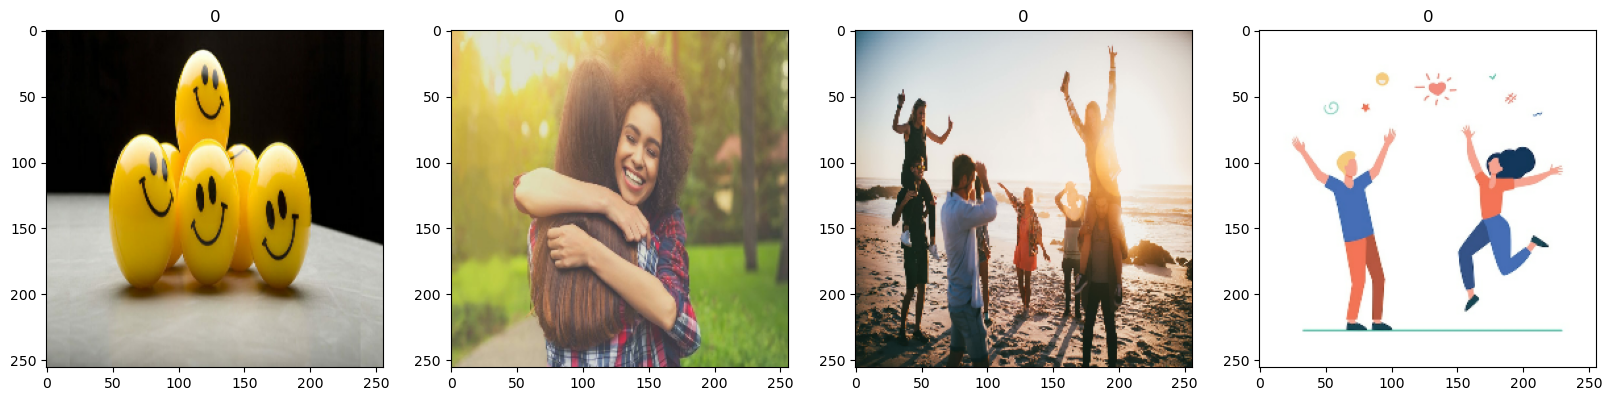

In [42]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess data